**Link Prediction task over Industry 4.0 Knowledge Graph**

> Building an Embedding model
*   Evaluating results
*   sLCWA vs LCWA

> Link Prediction
*   Head prediction
*   Tail prediction
- Compute the metrics precision, recall, and f_measure

> Unsupervised learning
*   Save Learned Embeddings
*   Apply cluster Algorithm: KMeans
*   Select the optimal number of clusters
*   Visualize PCA Projection to 2D









**Industry 4.0** (I4.0) standards and standardization frameworks provide a unified way to describe smart factories.
- Standards specify the main components, systems, and processes inside a smart factory and the interaction among all of them.
- Standardization frameworks classify standards according to their functions into layers and dimensions.

Frameworks can categorize similar standards differently.
- Interoperability conflicts are generated whenever smart factories are described with miss-classified standards.

**Discovering relation over I4.0 knowledge graphs to identify unknown relations among standards.**

**I4.0KG**

![I4.0KG](https://raw.githubusercontent.com/SDM-TIB/Demo_Link_Prediction/main/sto_motivating_example.png)

Git clone



In [ ]:
!git clone https://github.com/SDM-TIB/Demo_Link_Prediction.git

### **Install Pykeen**

In [ ]:
%%capture 
!pip install pykeen
from pkg_resources import require
require('pykeen')
!pip install rdflib

Loading auxiliary methods

In [ ]:
%cd Demo_Link_Prediction
from Demo_Link_Prediction import Auxiliary

/content/Demo_Link_Prediction


### Load dataset I4.0 KG

In [ ]:
file_name = 'sto-enriched-relatedTo.nt'
tf_data, triple_data = Auxiliary.load_dataset(file_name)
print('The first two triples:\n', triple_data[:2])
tf_data

Create training and testing set

In [ ]:
training, testing = tf_data.split(random_state=1234)

###**Building the model**

sLCWA: a random subset of the union of the head and tail generation strategies from LCWA are considered as negative triples.

In [ ]:
model_name = ??? 
training_loops = ???
epoch = ???
model, results = Auxiliary.create_model(training, testing, model_name, epoch, training_loops,'results_I4.0/')

#### **Evaluating the Results**

**Plot losses**

In [ ]:
results.plot_losses()

**Metric results**

- adjusted mean rank is between [0, 2]. Lower is better.
- mean rank is a positive integer, with a bound based on the number of entities. Lower is better!
- hits@k is reported between [0, 1] and interpreted as a percentage. Higher is better!

In [ ]:
metrics = results.metric_results.to_df()
print('Side:', metrics.Side.unique(), '\nType:', metrics.Type.unique())
metrics.loc[(metrics.Side==???) & (metrics.Type=='realistic')]

Side: ['both' 'head' 'tail'] 
Type: ['pessimistic' 'realistic' 'optimistic']


,Side,Type,Metric,Value
15,both,realistic,hits_at_1,0.689477
16,both,realistic,hits_at_3,0.721852
17,both,realistic,hits_at_5,0.737550
18,both,realistic,hits_at_10,0.764807
19,both,realistic,arithmetic_mean_rank,44.114807
20,both,realistic,geometric_mean_rank,3.118876
21,both,realistic,median_rank,1.000000
22,both,realistic,harmonic_mean_rank,1.396680
23,both,realistic,inverse_arithmetic_mean_rank,0.022668
24,both,realistic,inverse_geometric_mean_rank,0.320628


#### **Local Closed World Assumption (LCWA)**.
A particular subset of triples that are not part of the knowledge graph are considered as negative.
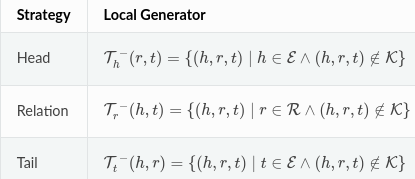

**Load a model**

In [ ]:
import torch
import pandas as pd
model_name='MuRE'
model_lcwa = torch.load('results_I4.0/LCWA/' + model_name + '/trained_model.pkl')

**Metric results**

- adjusted mean rank is between [0, 2]. Lower is better.
- mean rank is a positive integer, with a bound based on the number of entities. Lower is better!
- hits@k is reported between [0, 1] and interpreted as a percentage. Higher is better!

In [ ]:
metrics = pd.read_csv('results_I4.0/LCWA/' + model_name + '/metric_results.csv')
print('Side:', metrics.Side.unique(), '\nType:', metrics.Type.unique())
metrics.loc[(metrics.Side==???) & (metrics.Type=='realistic')]

Side: ['head' 'both' 'tail'] 
Type: ['realistic' 'pessimistic' 'optimistic']


,Side,Type,Metric,Value
47,both,realistic,hits_at_1,3.841863e-01
48,both,realistic,hits_at_3,4.099482e-01
49,both,realistic,hits_at_5,4.255894e-01
50,both,realistic,hits_at_10,4.490512e-01
51,both,realistic,arithmetic_mean_rank,9.201902e+02
52,both,realistic,geometric_mean_rank,3.345605e+01
53,both,realistic,median_rank,4.000000e+01
54,both,realistic,harmonic_mean_rank,2.458881e+00
55,both,realistic,inverse_arithmetic_mean_rank,1.086732e-03
56,both,realistic,inverse_geometric_mean_rank,2.988996e-02


# **Link Prediction**

The predictions are ordered by their scores. All interaction functions in PyKEEN have been implemented such that the higher the score (or less negative the score), the more likely a triple is to be true.

### **Predict head**

In [ ]:
predicate = '???'
obj = '???'
predicted_heads = Auxiliary.predict.get_head_prediction_df(model, predicate, obj, triples_factory=tf_data)
predicted_heads

#### Filter the prediction by the head ''<https://w3id.org/i40/sto#'

In [ ]:
predicted_heads = Auxiliary.filter_prediction(predicted_heads, '<https://w3id.org/i40/sto#')
predicted_heads

#### Plot of entities predicted score values

In [ ]:
score_values = predicted_heads.score.values
Auxiliary.plot_score_value(score_values, "Predicted_heads")

#### Strategy 'threshold'

In [ ]:
threshold, threshold_index = Auxiliary.get_threshold(predicted_heads, percentile=???)
Auxiliary.compute_metrics(predicted_heads, threshold_index, model_name)

### **Predict tails**

In [ ]:
predicate = ???
obj = ???
predicted_tails = Auxiliary.predict.get_tail_prediction_df(model, predicate, obj, triples_factory=tf_data)
predicted_tails

**Plot of entities predicted score values**

In [ ]:
score_values = predicted_tails.score.values
Auxiliary.plot_score_value(score_values, "Predicted tails")

**Compute metrics given a cut-off point**

In [ ]:
predicted_tails = Auxiliary.reset_index(predicted_tails)
Auxiliary.compute_metrics(predicted_tails, cut_index=???, model=model_name)

# **Unsupervised Learning**

**Save Learned Embeddings**

In [ ]:
entity_embedding_tensor, relation_embedding_tensor =  Auxiliary.get_learned_embeddings(model)

### **Computing clusters of the predicted heads by the model. Visualize PCA Projection to 2D**

**Creating dataframe with the embeddings predicted entities**

In [ ]:
df_predicted_entities = Auxiliary.create_dataframe_predicted_entities(entity_embedding_tensor, predicted_heads, training)

**Select the optimal number of clusters**

**elbow**: By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

In [ ]:
num_cls = Auxiliary.elbow_KMeans(df_predicted_entities, 1, 25)

**Visualize PCA Projection to 2D**

In [ ]:
Auxiliary.plot_cluster(num_cls, df_predicted_entities)

### **Visualize PCA Projection to 2D filtering the prediction by entity type 'Standard'.**

**Filter by entity type '<https://w3id.org/i40/sto#Standard>'**

In [ ]:
graph = Auxiliary.load_graph(file_name)
predicted_heads, entity = Auxiliary.get_triple(graph, predicted_heads, '<https://w3id.org/i40/sto#Standard>')
predicted_heads

**Creating dataframe with the embeddings predicted entities**

In [ ]:
df_predicted_entities_b = Auxiliary.create_dataframe_predicted_entities(entity_embedding_tensor, predicted_heads, training)

**Select the optimal number of clusters**

**elbow**: By default, the distortion score is computed, the sum of square distances from each point to its assigned center.

In [ ]:
num_cls_b = Auxiliary.elbow_KMeans(df_predicted_entities_b, 1, 25)

**Visualize PCA Projection to 2D**

In [ ]:
Auxiliary.plot_cluster(num_cls_b, df_predicted_entities_b)

### **Visualize PCA Projection to 2D of all I4.0KG entities**

In [ ]:
import pandas as pd
df = pd.DataFrame(entity_embedding_tensor.detach().numpy())
num_cls_b = Auxiliary.elbow_KMeans(df, 1, 25)

In [ ]:
Auxiliary.plot_cluster(num_cls_b, df)